# Sorting algorithms

In [1]:
import random 
import timeit
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def test(sort_algo, population=range(10), k=15):
    l = random.choices(population, k=k)
    print("input ", l)
    l_sorted = sort_algo(l)
    print("output", l_sorted)

Notation: $n$ is the number of elements in the list to be sorted.

### Bubble sort
Sorts the list by repeatedly passing through the list, comparing adjacent elements and swapping them if they are in the wrong order. <br>
Complexity: $\mathcal{O}(n^2)$

In [3]:
def bubble_sort(l):
    n = len(l)
    for i in range(n-1, 0, -1):
        for j in range(i, n):
            if l[j-1] > l[j]:
                l[j-1], l[j] = l[j], l[j-1]
    return l

In [4]:
test(bubble_sort)

input  [9, 5, 0, 6, 0, 1, 0, 1, 3, 5, 1, 6, 3, 0, 8]
output [0, 0, 0, 0, 1, 1, 1, 3, 3, 5, 5, 6, 6, 8, 9]


### Selection sort
Creates a new sorted list, initially empty, and repeatedly selects the smallest remaining element in the original list, removes it from the list and inserts it at the end of the new sorted list until the original list is empty.<br>
Alternative version: Finds and selects the smallest element in the list and swaps it with the first element of the list, then finds the second smallest element and swaps it with the second element of the list and so on until all elements are sorted. <br>
Complexity $\mathcal{O}(n^2)$

In [5]:
def selection_sort(l):
    sorted_l = []
    for _ in range(len(l)):
        min_val = l[0]
        min_idx = 0
        for idx,val in enumerate(l):
            if val < min_val:
                min_val = val
                min_idx = idx
        sorted_l.append(l.pop(min_idx))
    return sorted_l

def selection_sort_bis(l):
    n = len(l)
    for i in range(n-1):
        min_val = l[i]
        min_idx = i
        for j in range(i+1, n):
            if l[j] < min_val:
                min_val = l[j]
                min_idx = j
        l[i], l[min_idx] = l[min_idx], l[i]
    return l

In [6]:
test(selection_sort)
print("\nTest alternative version:")
test(selection_sort_bis)

input  [0, 7, 8, 8, 4, 0, 2, 3, 0, 7, 9, 8, 1, 7, 4]
output [0, 0, 0, 1, 2, 3, 4, 4, 7, 7, 7, 8, 8, 8, 9]

Test alternative version:
input  [3, 5, 7, 8, 8, 9, 2, 8, 5, 0, 6, 8, 9, 9, 9]
output [0, 2, 3, 5, 5, 6, 7, 8, 8, 8, 8, 9, 9, 9, 9]


### Insertion sort
Passes through the list from left to right, while keeping the left part sorted. A new element is inserted in the sorted (left) part of the list by comparing it against elements in the sorted part from right to left until its correct position is found. <br>
Complexity: $\mathcal{O}(n^2)$

In [7]:
def insertion_sort(l):
    n = len(l)
    for i in range(1, n):
        x = l[i]
        j = i
        while j > 0 and l[j-1] > x:
            l[j] = l[j-1]
            j -= 1
        l[j] = x
    return l

In [8]:
test(insertion_sort)

input  [4, 9, 0, 5, 1, 6, 5, 5, 1, 9, 7, 7, 6, 9, 2]
output [0, 1, 1, 2, 4, 5, 5, 5, 6, 6, 7, 7, 9, 9, 9]


### Merge sort
Divides the unsorted list into sublits of one element by repeatedly spliting the list and sublists at their middle point. Then repeatedly merges the sublists to produce new sorted sublists until forming one sorted list. <br>
Complexity: $\mathcal{O}(n \log n)$

In [9]:
def merge_sort(l):
    n = len(l)
    if n < 2:
        return l
    middle = n // 2
    left = merge_sort(l[:middle])
    right = merge_sort(l[middle:])
    l = []
    for i in range(n):
        if len(left) == 0:
            l.append(right.pop())
        elif len(right) == 0:
            l.append(left.pop())
        elif left[-1] < right[-1]:
            l.append(right.pop())
        else:
            l.append(left.pop())
    return list(reversed(l))

In [10]:
test(merge_sort)

input  [7, 9, 3, 6, 0, 9, 3, 6, 9, 5, 6, 2, 4, 1, 9]
output [0, 1, 2, 3, 3, 4, 5, 6, 6, 6, 7, 9, 9, 9, 9]


### Quicksort
Repeatedly divides the list into sublists by choosing a pivot (a random element in the list), then spliting into sublists of elements smaller than, greater than and equal to the pivot. Then repeatedly merges the sublists by concatenating the sublists in the right order until forming one sorted list. <br>
Complexity:
- Worst case: $\mathcal{O}(n^2)$
- On average: $\mathcal{O}(n \log n)$

In [11]:
def quick_sort(l):
    n = len(l)
    if n < 2:
        return l
    pivot = l[random.randrange(n)]
    smaller = []
    equal = []
    greater = []
    for x in l:
        if x < pivot:
            smaller.append(x)
        elif x == pivot:
            equal.append(x)
        else:
            greater.append(x)
    return quick_sort(smaller) + equal + quick_sort(greater)

In [12]:
test(quick_sort)

input  [7, 0, 2, 4, 9, 1, 6, 7, 7, 1, 3, 5, 3, 4, 1]
output [0, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6, 7, 7, 7, 9]


## Comparison of time complexity

In [13]:
def get_algo_times(sort_algos, sizes_n=(100,), range_values=10**9, rep=20, rep_same=1):
    """
    Estimate the average execution time sorting algorithms for different list lengths using timeit
    
    Args:
        sort_algos (list[function]): sorting functions which are tested
        sizes_n (iterator): lengths of the lists that are sorted during the tests
        range_values (int): the values in the list range from 0 to range_values-1
        rep (int): number of times the timeit function is called for algorithm and size k
        rep_same (int): number of repetitions in the timeit function
        
    Returns:
        tuple: mean and standard deviation of the mesured execution times

    """
    t_avg = []
    t_std = []
    for algo in sort_algos:
        algo_name = algo.__name__
        t_avg_algo = []
        t_std_algo = []
        for k in sizes_n:
            times = []
            for i in range(rep):
                setup = "import random"
                setup += f"\nfrom __main__ import {algo_name}"
                setup += f"\nl = random.choices(range({range_values}), k={k})"
                t = timeit.timeit(algo_name+"(l)", setup=setup, number=rep_same)
                times.append(t/rep_same)
            t_avg_algo.append(np.mean(times))
            t_std_algo.append(np.std(times))
        t_avg.append(t_avg_algo)
        t_std.append(t_std_algo)
    return np.array(t_avg), np.array(t_std)

In [14]:
sort_algos = (bubble_sort, selection_sort, insertion_sort, merge_sort, quick_sort)
sizes_n = np.linspace(5, 1000, 10, dtype=int)

t_avg, t_std = get_algo_times(sort_algos, sizes_n, range_values=10**9, rep=20)

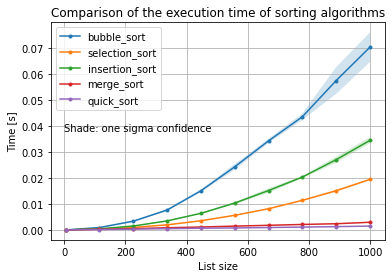

In [15]:
from matplotlib.patches import Patch
for i,algo in enumerate(sort_algos):
    t_av = t_avg[i]
    t_lo = t_avg[i] - t_std[i]
    t_hi = t_avg[i] + t_std[i]
    plt.plot(sizes_n, t_av, '.-', label=algo.__name__)
    plt.fill_between(sizes_n, t_lo, t_hi, alpha=0.2)
plt.title("Comparison of the execution time of sorting algorithms")
plt.annotate('Shade: one sigma confidence', xy=(0, sum(plt.ylim())/2))
plt.xlabel("List size")
plt.ylabel("Time [s]")
plt.legend()
plt.grid()

Comment:
- For bubble sort, selection sort and insertion sort, the shape of the curves looks parabolic which is coherent with quadratic time complexity.
- Bubble sort has the worst complexity, which is not suprising because only adjacent swaps are used (compared to selection sort and insertion sort).
- For Merge sort and Quicksort the shape of the curve is coherent with a $n \log n$ growth.

### Comparing in log-log scale

In [16]:
sizes_n = np.logspace(1, 3.2, 10, dtype=int)
t_avg, t_std = get_algo_times(sort_algos, sizes_n, range_values=100, rep=20)

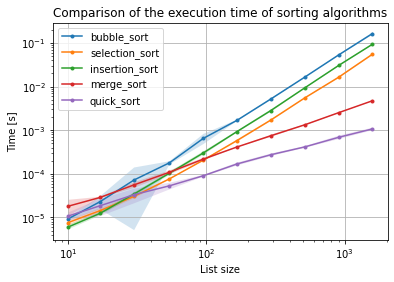

In [17]:
for i,algo in enumerate(sort_algos):
    t_av = t_avg[i]
    t_lo = t_avg[i] - t_std[i]
    t_hi = t_avg[i] + t_std[i]
    plt.loglog(sizes_n, t_av, '.-', label=algo.__name__)
    plt.fill_between(sizes_n, t_lo, t_hi, alpha=0.2)
plt.title("Comparison of the execution time of sorting algorithms")
plt.xlabel("List size")
plt.ylabel("Time [s]")
plt.legend()
plt.grid()

Comments:
- There seems to be two slope values: one bigger slope corresponding to $\mathcal{O}(n^2)$ complexity algoritms (for bubble, insertion and selection sort) and one smaller slope corresponding to $\mathcal{O}(n \log n)$ complexity algorithms (merge sort and quicksort).
- **+20 dB/decade**: for the bubble, insertion and selection sort algorithms, the execution time is roughly multiplied by 100 when the number of elements in the list is multiplied by 10. This shows that the execution time is indeed proportional to the square of the size of the list.
- Amongst the tested algoritms, **Quicksort** appears to be the fastest on average for sorting large lists. Eventhough quicksort has a worst time-complexity than merge sort, it peforms better on average.
- For **small list sizes** (smaller than 30 elements) selection sort and insertion sort peform better than merge sort and quicksort

### Merge sort vs quick sort
#### Dependance on the range of values in the list

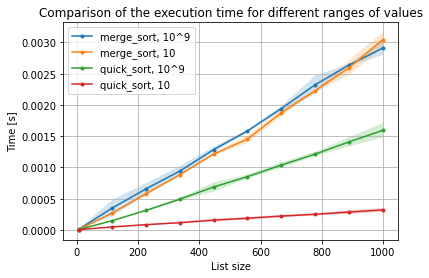

In [18]:
sort_algos = (merge_sort, quick_sort)
sort_algo_names = tuple([algo.__name__ for algo in sort_algos])
sizes_n = np.linspace(5, 1000, 10, dtype=int)

t_avg, t_std = get_algo_times(sort_algos, sizes_n, range_values=10**9, rep=20)
t_avg_small, t_std_small = get_algo_times(sort_algos, sizes_n, range_values=10, rep=20)

for i in range(len(sort_algos)):
    t_av = t_avg[i]
    t_lo = t_avg[i] - t_std[i]
    t_hi = t_avg[i] + t_std[i]
    t_av_small = t_avg_small[i]
    t_lo_small = t_avg_small[i] - t_std_small[i]
    t_hi_small = t_avg_small[i] + t_std_small[i]
    plt.plot(sizes_n, t_av, '.-', label=sort_algo_names[i]+', 10^9')
    plt.fill_between(sizes_n, t_lo, t_hi, alpha=0.2)
    plt.plot(sizes_n, t_av_small, '.-', label=sort_algo_names[i]+', 10')
    plt.fill_between(sizes_n, t_lo_small, t_hi_small, alpha=0.2)
plt.title("Comparison of the execution time for different ranges of values")
plt.xlabel("List size")
plt.ylabel("Time [s]")
plt.legend()
plt.grid()

Comment: <br>
The graph shows how the execution time evolves with the list size for list containing 10 possible values (between 0 and 9) or 1 billion possible values (between 0 and 999,999).
The merge sort peforms the same in terms of execution time for both ranges of values, whereas the quicksort algorithm peforms much better with a smaller range of values. This is because the number of splits and merges computed in the Quicksort algorithm is bounded by the number of possible values in the list (there are at most 10 when values range between 0-9), whereas in the Merge sort algorithm, the number of splits only depends on the list size.

#### Worst-case senario in Quicksort
When the initial list is carefully chosen such as the pivot positions chosen in the Quicksort algorithm always corresponds to an extremum of the values in the list, then the execution time of the Quicksort algorithm is in $\mathcal{O}(n^2)$. In this case we will set the initial list and the random seed such that the pivot chosen in the Quicksort algorithm is always the minimum.

In [19]:
def get_setup_str(seed_a, seed_b, algo_name, size_n):
    setup = f"""
import random
from __main__ import {algo_name}
random.seed({seed_a})
pivots = [random.randrange(n) for n in range({size_n}, 0, -1)]
random.seed({seed_b})
l = ['NA'] * {size_n}
for i,p in enumerate(pivots):
    counter = 0
    for j,v in enumerate(l):
        if v == 'NA':
            counter += 1
            if counter > p:
                break
    l[j] = i
"""
    return setup


def get_worst_time(cases, sizes_n, range_values=10**9, rep=20):
    t_avg = []
    t_std = []
    for case in cases:
        t_avg_case = []
        t_std_case = []
        setup_args = {'algo_name': case['algo_name']}
        for size_n in sizes_n:
            setup_args['size_n'] = size_n
            times = []
            for i in range(rep):
                setup_args['seed_a'] = random.randrange(1000)
                if case['seeds'] == 'same':
                    setup_args['seed_b'] = setup_args['seed_a']
                else:
                    setup_args['seed_b'] = setup_args['seed_a'] + 1
                setup = get_setup_str(**setup_args)
                t = timeit.timeit(case['algo_name']+'(l)', setup=setup, number=1)
                times.append(t)
            t_avg_case.append(np.mean(times))
            t_std_case.append(np.std(times))
        t_avg.append(t_avg_case)
        t_std.append(t_std_case)
    return np.array(t_avg), np.array(t_std)


case1 = {'seeds': 'same', 'algo_name': 'quick_sort'}
case2 = {'seeds': 'same', 'algo_name': 'merge_sort'}
case3 = {'seeds': 'different', 'algo_name': 'quick_sort'}
#case4 = {'seeds': 'different', 'algo_name': 'merge_sort'}
cases = [case1, case2, case3]

sizes_n = np.linspace(5, 1000, 10, dtype=int)
t_avg, t_std = get_worst_time(cases, sizes_n, range_values=10**9, rep=20)

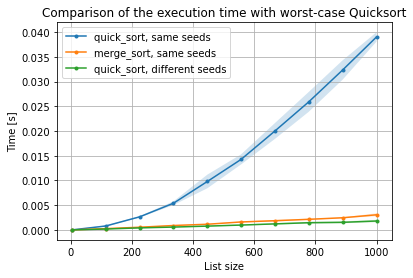

In [20]:
plt.figure(1)
for i,case in enumerate(cases):
    t_av = t_avg[i]
    t_lo = t_avg[i] - t_std[i]
    t_hi = t_avg[i] + t_std[i]
    plt.plot(sizes_n, t_av, '.-', label=case['algo_name']+', '+case['seeds']+' seeds')
    plt.fill_between(sizes_n, t_lo, t_hi, alpha=0.2)
plt.title("Comparison of the execution time with worst-case Quicksort")
plt.xlabel("List size")
plt.ylabel("Time [s]")
plt.legend()
plt.grid()

Comment: <br>
As expected, the curve for the worst-case Quicksort execution time has a parabolic shape which is coherent with quadratic complexity. When taking the exact same initial list as input, the mergesort algorithm peforms the same as usual with complexity in $\mathcal{O}(n \log n)$ which is much better than the Quicksort algorithm. Also, when changing the seed for chosing pivots pseudorandomly in the Quicksort algorithm, the execution time is drastically reduced and reflects the time complexity of $\mathcal{O}(n \log n)$ in the average case.

#### Log-log scale

In [21]:
sizes_n = np.logspace(1, 3.2, 10, dtype=int)
t_avg, t_std = get_worst_time(cases, sizes_n, range_values=10**9, rep=20)

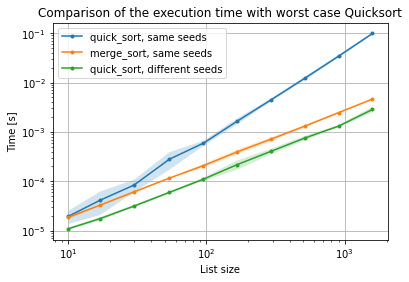

In [22]:
for i,case in enumerate(cases):
    t_av = t_avg[i]
    t_lo = t_avg[i] - t_std[i]
    t_hi = t_avg[i] + t_std[i]
    plt.loglog(sizes_n, t_av, '.-', label=case['algo_name']+', '+case['seeds']+' seeds')
    plt.fill_between(sizes_n, t_lo, t_hi, alpha=0.2)
plt.title("Comparison of the execution time with worst case Quicksort")
plt.xlabel("List size")
plt.ylabel("Time [s]")
plt.legend()
plt.grid()

Comment: <br>
For large enough list sizes, we can see the +20 dB/decade increase for the Quicksort algorithm (in the worst case).